## Basic Step: Load Lambert Datafile and Plot the Measurements in the Stereonet

Start with importing all he necessary python modules. The mplstereonet module provides all the functinality to evaluate tectonic data. Numpy is the module for the maths and matplotlib the module for plotting.

In [2]:
import numpy as np
import mplstereonet
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Netx, read in the data file from Lambert. There are many ways to read text files with python. In this example, I use calls to the module pandas, which provides many powerful functions to read and manipulate files.In the example, the data will be stored to the array 'df'. Have a close look at the call to pandas read_csv method. Only 3 data columns will be imported to df: the id, the azimut and the dip values. All data columns can be idetified by their header.
And make sure that LambertData.txt is in the working directory. Otherwise, you have to specify the path to the file name.

In [3]:
df = pd.read_csv('LambertData.txt', header = 0,
             sep='\t', usecols=['id','azimut', 'dip'], index_col=0)

There is one minor problem, however: the stereonet methodes of mplstereonet need to have the tectonic data as strike/dip but Lambert stores the data as azimut/dip. Therefore, we have to add one more data column to df, which contains the strike data. First, we have to define an empty list (aka array), here called st. Next, we loop the df list and calculate from the individual azimut values the strike values. For this, we use a method provided by mplstereonet, which converts 'dip_direction' (=azimut) to strike. Next, we add this list to df. Print it out to check the data.

In [4]:
st=[]
for azimut in df['azimut']:
    st.append(mplstereonet.utilities.dip_direction2strike(azimut))

df['strike'] = st  
print(df['strike'])

id
5     245.6
6     248.3
7     246.5
8     244.5
9     249.7
10    246.3
11    242.5
12    247.0
13    245.1
14    248.3
15    242.7
16    241.4
17     17.2
18     85.2
19     81.2
20     81.7
21     91.8
22     92.4
23    112.9
24     95.7
25     96.0
26     83.7
27    101.5
Name: strike, dtype: float64


We are now ready to plot the stereonet with our measurements.

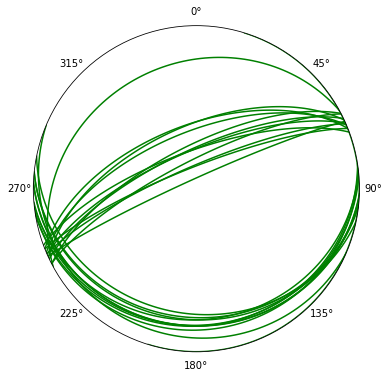

In [5]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(df['strike'], df['dip'], c='g');

In [6]:
strike1, dip1 = 10, 30
strike2, dip2 = 315, 78

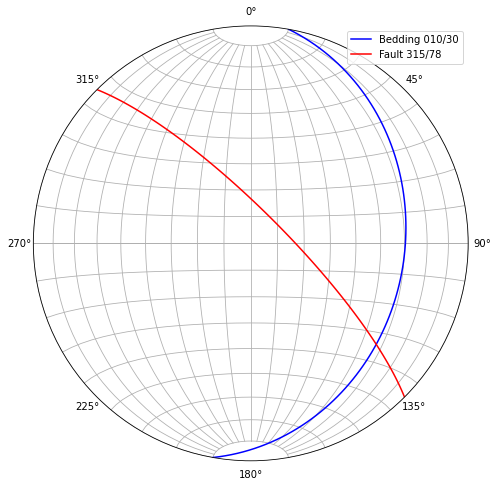

In [7]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(strike1, dip1, c='b', label='Bedding %03d/%02d' % (strike1, dip1))
ax.plane(strike2, dip2, c='r', label='Fault %03d/%02d' % (strike2, dip2))
ax.legend()
ax.grid()

In [8]:
fold_measurements = '''
    N 85 E, 12 N
    N 70 E, 27 NW
    N 66 E, 40 NW
    N 47 E, 53 SE
    N 33 E, 30 SE
    N 23 E, 29 E
'''

In [9]:
strikes, dips = zip(*[mplstereonet.utilities.parse_strike_dip(*s.strip().split(', ')) 
                      for s in fold_measurements.split('\n') if s])

strikes, dips

((265.0, 250.0, 246.0, 47.0, 33.0, 23.0), (12.0, 27.0, 40.0, 53.0, 30.0, 29.0))

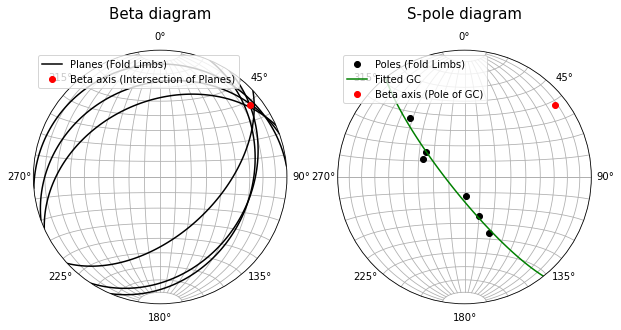

In [10]:
from collections import OrderedDict

fig = plt.figure(figsize=(10,5))

# Method 1

ax = fig.add_subplot(121, projection='stereonet')
ax.plane(strikes, dips, c='k', label='Planes (Fold Limbs)')
strike, dip = mplstereonet.fit_girdle(strikes, dips)
ax.pole(strike, dip, c='r', label='Beta axis (Intersection of Planes)')

# Method 2

ax = fig.add_subplot(122, projection='stereonet')
ax.pole(strikes, dips, c='k', label='Poles (Fold Limbs)')
ax.plane(strike, dip, c='g', label='Fitted GC')
ax.pole(strike, dip, c='r', label='Beta axis (Pole of GC)')

for ax, title in zip(fig.axes[1::2], ['Beta diagram', 'S-pole diagram']):
    ax.set_title(title, y=1.10, fontsize=15)
    ax.grid()

    # This will avoid repetition in the legend:
    handles, labels = ax.get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))

    ax.legend(by_label.values(), by_label.keys(), loc='upper left')


In [11]:
dir(mplstereonet.stereonet_math)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__warningregistry__',
 '_repole',
 '_rotate',
 '_rotate_x',
 '_rotate_y',
 '_rotate_z',
 'angular_distance',
 'antipode',
 'azimuth2rake',
 'cart2sph',
 'cone',
 'fisher_stats',
 'geographic2plunge_bearing',
 'geographic2pole',
 'line',
 'mean_vector',
 'np',
 'plane',
 'plane_intersection',
 'plunge_bearing2pole',
 'pole',
 'pole2plunge_bearing',
 'project_onto_plane',
 'rake',
 'sph2cart',
 'stereonet2xyz',
 'vector2plunge_bearing',
 'vector2pole',
 'xyz2stereonet']